In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading data exercise.renin_aldo.csv

In [2]:
renin_aldo = pd.read_csv('exercise.renin_aldo.csv', index_col=[0])

In [3]:
renin_aldo.head()

,BIRTH_DATE,GENDER_MASTER_CODE,ORDER_START_DATE,RESULT_VALUE,RESULT_ITEM_CODE,MASTER_LOCATION_DESCRIPTION,ID
1,8/11/34 7:34,F,6/1/99 18:50,2.6,RENIN,RENAL-HYPERTENSION-STONE,3785
2,8/11/34 7:34,F,6/1/99 18:50,19.3,ALDOSTERONE,RENAL-HYPERTENSION-STONE,3785
3,7/10/23 11:24,F,8/24/05 22:27,0.4,RENIN,RENAL-HYPERTENSION-STONE,2581
4,7/10/23 11:24,F,8/24/05 22:27,2.6,ALDOSTERONE,RENAL-HYPERTENSION-STONE,2581
5,5/18/47 10:04,M,6/16/01 10:04,0.1,RENIN,{{UNSPEC LAB DEPT}},1367


### Drop rows with missing RESULT_VALUE

In [4]:
renin_aldo = renin_aldo[renin_aldo.RESULT_VALUE.notnull()]

### All the birth years 

In [5]:
# For BIRTH_YEAR below 17, we cannot be certain of whether it was born in 1900s or 2000s
# What if BIRTH_YEAR is 13, and ORDER_YEAR is 16? Would it be a better idea to keep track
# of YEAR data in the format of ****?
np.unique([r.split('/')[2].split(' ')[0] for r in renin_aldo.BIRTH_DATE.unique()])

array(['11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98'], 
      dtype='|S2')

### All the test order years

In [6]:
# Looking at the all the unique ORDER years in the data,
# we can conclude that all lab tests were ordered between 1999 and 2016.
np.unique([r.split('/')[2].split(' ')[0] for r in renin_aldo.ORDER_START_DATE.unique()])

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '99'], 
      dtype='|S2')

### Calculate age 

In [7]:
CURRENT_YEAR = 17

def return_age(row):
    birth_year = int(row['BIRTH_DATE'].split('/')[2].split(' ')[0])
    order_year = int(row['ORDER_START_DATE'].split('/')[2].split(' ')[0])
    # if order_year is 1999, birth_year is 1935, then age is 99 - 35 = 64;
    # if order_year is 2005, birth_year is 1935, then age is 100 + 5 - 35 = 70
    if order_year < CURRENT_YEAR:
        order_year = 100 + order_year
    age = order_year - birth_year
    return age

renin_aldo['AGE'] = renin_aldo.apply(lambda row: return_age(row), axis=1)

### All unique ages calculated

In [8]:
# No negative ages.
print sorted(renin_aldo.AGE.unique())

[10, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 100, 101]


In [9]:
# Technically, we cannot be confident of the real age of the following subjects.
# Since they could be born in the 1900s or 2000s.
# It might be a good idea to drop the following rows.
renin_aldo.loc[renin_aldo.AGE > 99]

,BIRTH_DATE,GENDER_MASTER_CODE,ORDER_START_DATE,RESULT_VALUE,RESULT_ITEM_CODE,MASTER_LOCATION_DESCRIPTION,ID,AGE
12516,3/27/15 22:35,M,4/6/15 20:55,219,RENIN,HUP,4307,100
12811,12/28/15 23:09,M,1/11/16 12:00,9.5,RENIN,PENNSYLVANIA HOSPITAL,4122,101
12812,12/28/15 23:09,M,1/11/16 12:00,91,ALDOSTERONE,PENNSYLVANIA HOSPITAL,4122,101
12892,3/29/16 16:04,M,4/30/16 2:25,17950,ALDOSTERONE,HUP,4758,100
12903,5/10/16 8:30,F,5/13/16 3:45,1.7,RENIN,PENNSYLVANIA HOSPITAL,984,100
12904,5/10/16 8:30,F,5/13/16 3:45,95.1,ALDOSTERONE,PENNSYLVANIA HOSPITAL,984,100
12943,7/2/16 0:48,F,7/8/16 21:01,9,RENIN,PENNSYLVANIA HOSPITAL,3888,100
12962,9/25/16 3:13,M,10/6/16 5:55,37,RENIN,PENNSYLVANIA HOSPITAL,4853,100


### Drop rows with age above 99.

In [10]:
renin_aldo = renin_aldo.loc[renin_aldo.AGE < 100]

### Unique tests 

In [11]:
renin_aldo.RESULT_ITEM_CODE.unique()

array(['RENIN', 'ALDOSTERONE', 'DIRECT_RENIN'], dtype=object)

In [12]:
# Assume DIRECT_RENIN, RENIN_ACTIVITY, and RENIN are equivalent tests.
renin_aldo.loc[renin_aldo.RESULT_ITEM_CODE.isin(['DIRECT_RENIN', 'RENIN_ACTIVITY']), 
               'RESULT_ITEM_CODE'] = 'RENIN'

### Unique genders

In [13]:
# The gender column values look good. 
# (Sometimes, people use mixed terms [1, 2, 'male', 'female', ...])
renin_aldo.GENDER_MASTER_CODE.unique()

array(['F', 'M'], dtype=object)

### Convert RESULT_VALUE to float format 

#### While converting RESULT_VALUE to float format, we found that there are some data like '<1.6' and 'PENDING'. We could drop those rows, since we are not sure if they could provide useful information for our prediction.

In [14]:
# RESULT_VALUE column contains non-numerical values.
renin_aldo['RESULT_VALUE'] = renin_aldo['RESULT_VALUE'].map(lambda x: float(x))

ValueError: could not convert string to float: < 1.6

In [15]:
def convert_value(x):
    try:
        return float(x)
    except:
        return np.NaN

# Unless we have more information, we will drop rows with non-numerical values.
renin_aldo['RESULT_VALUE'] = renin_aldo['RESULT_VALUE'].map(lambda x: convert_value(x))
renin_aldo = renin_aldo[renin_aldo.RESULT_VALUE.notnull()]

### Subset rows of RENIN and ALDOSTERONE into two dataframes

In [16]:
renin = renin_aldo.loc[renin_aldo.RESULT_ITEM_CODE == 'RENIN']
aldo = renin_aldo.loc[renin_aldo.RESULT_ITEM_CODE == 'ALDOSTERONE']

renin = renin.rename(columns={'RESULT_VALUE': 'RESULT_VALUE_RENIN'})
aldo = aldo.rename(columns={'RESULT_VALUE': 'RESULT_VALUE_ALDO'})

### Merge RENIN and ALDOSTERONE dataframes

In [17]:
renin_aldo = renin.merge(aldo, on=['ID', 'AGE', 'ORDER_START_DATE', 'GENDER_MASTER_CODE', 
                                   'BIRTH_DATE', 'MASTER_LOCATION_DESCRIPTION'])

In [18]:
renin_aldo.head()

,BIRTH_DATE,GENDER_MASTER_CODE,ORDER_START_DATE,RESULT_VALUE_RENIN,RESULT_ITEM_CODE_x,MASTER_LOCATION_DESCRIPTION,ID,AGE,RESULT_VALUE_ALDO,RESULT_ITEM_CODE_y
0,8/11/34 7:34,F,6/1/99 18:50,2.6,RENIN,RENAL-HYPERTENSION-STONE,3785,65,19.3,ALDOSTERONE
1,7/10/23 11:24,F,8/24/05 22:27,0.4,RENIN,RENAL-HYPERTENSION-STONE,2581,82,2.6,ALDOSTERONE
2,5/18/47 10:04,M,6/16/01 10:04,0.1,RENIN,{{UNSPEC LAB DEPT}},1367,54,12.8,ALDOSTERONE
3,9/8/30 6:57,F,9/1/11 20:15,0.1,RENIN,GERIATRICS RALSTON HOUSE,2410,81,17.7,ALDOSTERONE
4,4/17/24 19:35,M,11/21/04 5:02,2.5,RENIN,RENAL-HYPERTENSION-STONE,2160,80,4.5,ALDOSTERONE


### Calculate aldo:renin ratio

In [19]:
renin_aldo['ALDO_RENIN_RATIO'] = renin_aldo['RESULT_VALUE_ALDO'] * 1.0 / renin_aldo['RESULT_VALUE_RENIN']

### Distribution of aldo:renin ratio values

/ihme/forecasting/envs/jiawei_conda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


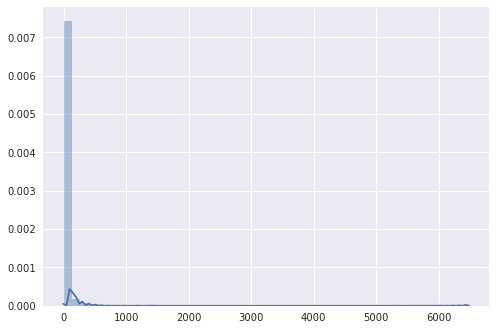

In [20]:
sns.distplot(renin_aldo.ALDO_RENIN_RATIO.values)

### 10 largest ratio values

In [21]:
renin_aldo.ALDO_RENIN_RATIO.nlargest(10)

3946    6480.000000
1863    1440.000000
959     1176.000000
1356     958.333333
3310     849.000000
3357     736.000000
992      599.500000
3165     593.000000
3478     552.000000
1636     537.000000
Name: ALDO_RENIN_RATIO, dtype: float64

### Some statistics of ratio values. (median, 2.5 percentile, 97.5 percentile)

In [22]:
np.median(renin_aldo.ALDO_RENIN_RATIO.values)

7.1380952380952376

In [23]:
# Do we need to drop ratio values above 97.5 percentile?
np.percentile(renin_aldo.ALDO_RENIN_RATIO.values, 97.5)

181.0

In [24]:
# Do we need to drop ratio values below 2.5 percentile?
np.percentile(renin_aldo.ALDO_RENIN_RATIO.values, 2.5)

0.17966799204771372

### Select columns we will need later.

In [25]:
cols = ['ID', 'ORDER_START_DATE', 'GENDER_MASTER_CODE', 'AGE', 'ALDO_RENIN_RATIO']
renin_aldo = renin_aldo.loc[:, cols]

In [26]:
renin_aldo.head()

,ID,ORDER_START_DATE,GENDER_MASTER_CODE,AGE,ALDO_RENIN_RATIO
0,3785,6/1/99 18:50,F,65,7.423077
1,2581,8/24/05 22:27,F,82,6.500000
2,1367,6/16/01 10:04,M,54,128.000000
3,2410,9/1/11 20:15,F,81,177.000000
4,2160,11/21/04 5:02,M,80,1.800000


### Drop ratio values outside 2.5 and 97.5 percentile

In [27]:
renin_aldo = renin_aldo.loc[(renin_aldo.ALDO_RENIN_RATIO <= 181) & 
                            (renin_aldo.ALDO_RENIN_RATIO >= 0.18)]

### Plot the distribution after dropping

#### The ratio values seem to have a log-normal distribution. Most ratio values are below 25.

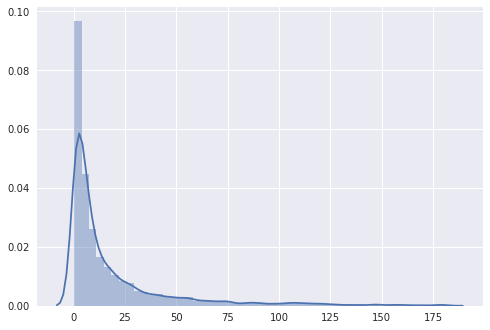

In [28]:
sns.distplot(renin_aldo.ALDO_RENIN_RATIO.values)

### Read exercise.labs.csv

In [29]:
labs = pd.read_csv('exercise.labs.csv', index_col=[0])

In [30]:
labs.head()

,RAR_DT,ORDER_START_DATE,RESULT_VALUE,RESULT_ITEM_CODE,ID
1,2/20/15 7:43,2/17/15 7:07,93,CHLORIDE,4875
2,2/20/15 7:43,2/20/15 7:43,73,RENIN,4875
3,2/20/15 7:43,2/20/15 7:43,108,GLUCOSE,4875
4,2/20/15 7:43,2/17/15 7:07,35,CARBON_DIOXIDE,4875
5,2/20/15 7:43,2/17/15 7:07,137,SODIUM,4875


### All lab tests

In [31]:
labs.RESULT_ITEM_CODE.unique()

array(['CHLORIDE', 'RENIN', 'GLUCOSE', 'CARBON_DIOXIDE', 'SODIUM',
       'UREA_NITROGEN', 'CREATININE', 'CALCIUM', 'ALDOSTERONE',
       'POTASSIUM', 'HEMATOCRIT', 'RDW', 'WBC', 'PLATELETS',
       'MEAN_CELLULAR_HEMOGLOBIN_CONCENTRATION', 'RED_BLOOD_CELLS',
       'MEAN_CELLULAR_VOLUME', 'HEMOGLOBIN', 'MEAN_CELLULAR_HEMOGLOBIN',
       'RENIN_ACTIVITY'], dtype=object)

### Convert RESULT_VALUE to float format and drop non-numerical values

In [32]:
labs['RESULT_VALUE'] = labs['RESULT_VALUE'].map(lambda x: convert_value(x))
labs = labs[labs.RESULT_VALUE.notnull()]

In [33]:
# ORDER_START_DATE column is not important and might conflict with 
# ORDER_START_DATE in renin_aldo data. So we can drop it.
labs = labs.drop(['ORDER_START_DATE'], axis=1)

### Merge renin_aldo dataframe with labs dataframe

In [34]:
# Note that RAR_DT is Date/time of an associated renin/aldosterone laboratory collection
test = renin_aldo.merge(labs, left_on=['ID', 'ORDER_START_DATE'], right_on=['ID', 'RAR_DT'])

In [39]:
test.head(20)

,ID,ORDER_START_DATE,GENDER_MASTER_CODE,AGE,ALDO_RENIN_RATIO,RAR_DT,RESULT_VALUE,RESULT_ITEM_CODE
0,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,93.00,CHLORIDE
1,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,73.00,RENIN
2,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,108.00,GLUCOSE
3,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,35.00,CARBON_DIOXIDE
4,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,137.00,SODIUM
5,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,33.00,UREA_NITROGEN
6,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,87.00,CHLORIDE
7,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,106.00,GLUCOSE
8,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,1.73,CREATININE
9,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,138.00,SODIUM


### Clean and reshape the merged data so the lab test data will be column data

In [38]:
test[test.duplicated(['ID', 'RAR_DT', 'RESULT_ITEM_CODE'])]

,ID,ORDER_START_DATE,GENDER_MASTER_CODE,AGE,ALDO_RENIN_RATIO,RAR_DT,RESULT_VALUE,RESULT_ITEM_CODE
6,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,87.00,CHLORIDE
7,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,106.00,GLUCOSE
9,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,138.00,SODIUM
13,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,37.00,CARBON_DIOXIDE
14,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,3.20,POTASSIUM
15,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,1.84,CREATININE
16,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,41.00,UREA_NITROGEN
17,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,9.90,CALCIUM
46,1166,8/30/15 13:12,F,91,1.309524,8/30/15 13:12,3.43,RED_BLOOD_CELLS
52,1166,8/30/15 13:12,F,91,1.309524,8/30/15 13:12,184.00,GLUCOSE


In [40]:
test.query("ID == 4875 and RESULT_ITEM_CODE == 'CREATININE'")

,ID,ORDER_START_DATE,GENDER_MASTER_CODE,AGE,ALDO_RENIN_RATIO,RAR_DT,RESULT_VALUE,RESULT_ITEM_CODE
8,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,1.73,CREATININE
15,4875,2/20/15 7:43,F,70,0.213699,2/20/15 7:43,1.84,CREATININE


In [41]:
test = pd.pivot_table(test, values=['RESULT_VALUE'], 
               index=['ID', 'GENDER_MASTER_CODE', 'AGE', 'ALDO_RENIN_RATIO'],
               columns=['RESULT_ITEM_CODE']) \
         .reset_index()

colnames = []
for i, a in enumerate(test.columns.get_level_values(1)):
    colnames.append(str(a) + '_' + str(test.columns.get_level_values(0)[i]))
    
test.columns = colnames

for col in test.columns:
    if col.startswith('_'):
        test = test.rename(columns={col: col.strip('_')})

    if 'VALUE' in col:
        test = test.rename(columns={col: col.split('_RESULT_VALUE')[0]})

In [43]:
test.query("ID==4875")

,ID,GENDER_MASTER_CODE,AGE,ALDO_RENIN_RATIO,ALDOSTERONE,CALCIUM,CARBON_DIOXIDE,CHLORIDE,CREATININE,GLUCOSE,...,MEAN_CELLULAR_HEMOGLOBIN_CONCENTRATION,MEAN_CELLULAR_VOLUME,PLATELETS,POTASSIUM,RDW,RED_BLOOD_CELLS,RENIN,SODIUM,UREA_NITROGEN,WBC
1074,4875,F,70,0.213699,15.6,9.8,36.0,90.0,1.785,107.0,...,NaN,NaN,NaN,3.05,NaN,NaN,73.0,137.5,37.0,NaN


In [42]:
# The NaN values might cause some problems later.
test.head()

,ID,GENDER_MASTER_CODE,AGE,ALDO_RENIN_RATIO,ALDOSTERONE,CALCIUM,CARBON_DIOXIDE,CHLORIDE,CREATININE,GLUCOSE,...,MEAN_CELLULAR_HEMOGLOBIN_CONCENTRATION,MEAN_CELLULAR_VOLUME,PLATELETS,POTASSIUM,RDW,RED_BLOOD_CELLS,RENIN,SODIUM,UREA_NITROGEN,WBC
0,6,F,58,19.250000,7.7,10.700000,27.000000,105.000000,0.950000,180.00,...,NaN,NaN,NaN,4.200000,NaN,NaN,0.40,139.0,23.000000,NaN
1,21,M,57,103.000000,10.3,8.900000,32.000000,102.000000,1.270000,92.00,...,NaN,NaN,NaN,4.100000,NaN,NaN,0.10,137.0,15.000000,NaN
2,23,M,60,0.775000,3.1,8.566667,28.857143,101.166667,0.758571,115.25,...,31.666667,86.333333,166.333333,4.728571,14.55,3.493333,4.00,133.4,11.857143,9.0
3,27,F,20,7.439614,15.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN
4,32,F,39,4.521739,10.4,8.600000,25.000000,106.000000,0.700000,87.00,...,NaN,NaN,NaN,4.200000,NaN,NaN,2.30,139.0,12.000000,NaN


## Explore the cleaned dataset

### Pairplot of ALDO_RENIN_RATIO data with other variables

#### Since there are 20 predictors, it's a good idea to visualize the relationship in three batches.

/ihme/forecasting/envs/jiawei_conda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/ihme/forecasting/envs/jiawei_conda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


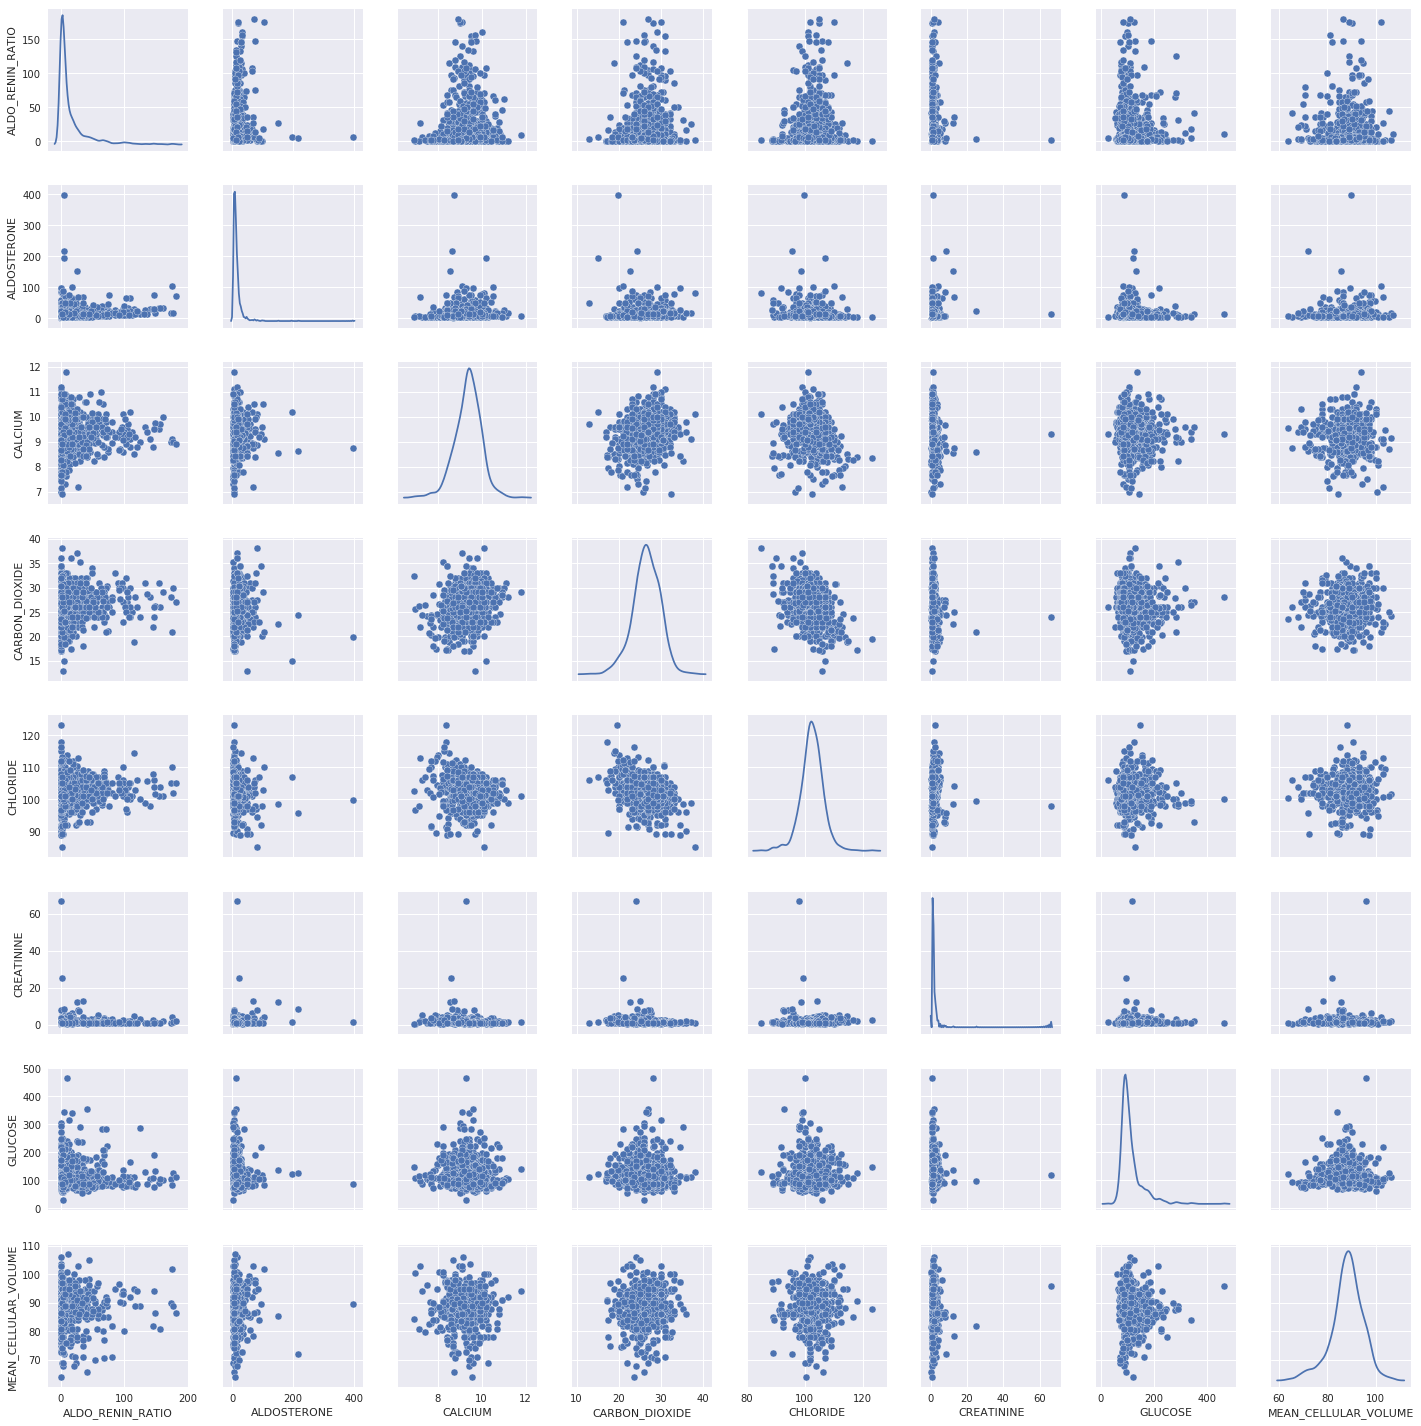

In [40]:
sns.pairplot(test, vars=['ALDO_RENIN_RATIO', 'ALDOSTERONE', 'CALCIUM',
                         'CARBON_DIOXIDE', 'CHLORIDE', 'CREATININE', 'GLUCOSE',
                         'MEAN_CELLULAR_VOLUME'],
             diag_kind='kde')

#### Since our target variable is aldo:renin ratio, we don't need so many graphs. All we need is the first row of graphs above.

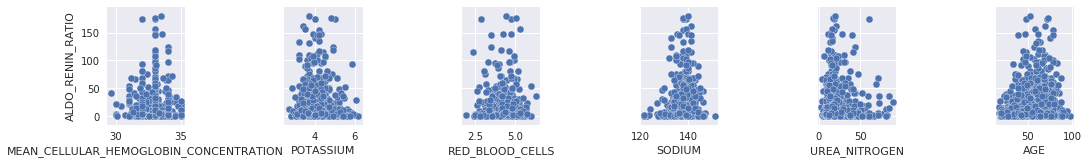

In [41]:
x_vars = ['MEAN_CELLULAR_HEMOGLOBIN_CONCENTRATION', 'POTASSIUM', 
          'RED_BLOOD_CELLS', 'SODIUM', 'UREA_NITROGEN', 'AGE']
y_vars = ['ALDO_RENIN_RATIO']
pp = sns.pairplot(data=test, x_vars=x_vars, y_vars=y_vars)

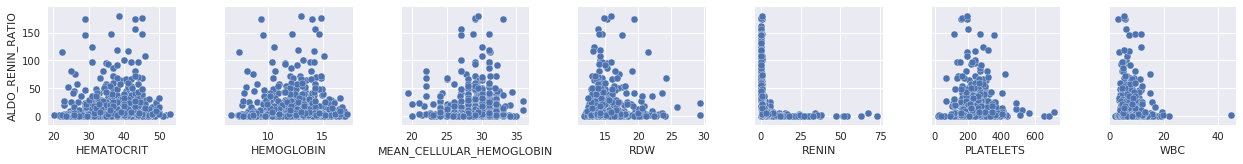

In [42]:
x_vars = ['HEMATOCRIT', 'HEMOGLOBIN', 'MEAN_CELLULAR_HEMOGLOBIN',
          'RDW', 'RENIN', 'PLATELETS', 'WBC']
y_vars = ['ALDO_RENIN_RATIO']
pp = sns.pairplot(data=test, x_vars=x_vars, y_vars=y_vars)

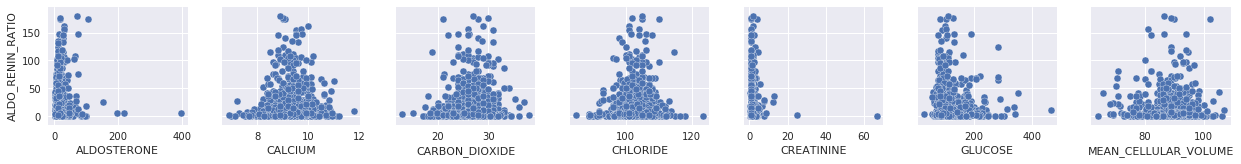

In [43]:
x_vars = ['ALDOSTERONE', 'CALCIUM', 'CARBON_DIOXIDE', 'CHLORIDE', 
          'CREATININE', 'GLUCOSE', 'MEAN_CELLULAR_VOLUME']
y_vars = ['ALDO_RENIN_RATIO']
pp = sns.pairplot(data=test, x_vars=x_vars, y_vars=y_vars)

#### Looking at the graphs agove, I cannot find any strong relationship between ALDO_RENIN_RATIO and other variables. Let's see if there's any relationship between ALDO_RENIN_RATIO above 30 and other predictors.

### Explore relationship between ALDO_RENIN_RATIO above 30 and other variables.

In [44]:
elevated_ratio = test.loc[test.ALDO_RENIN_RATIO >= 30]

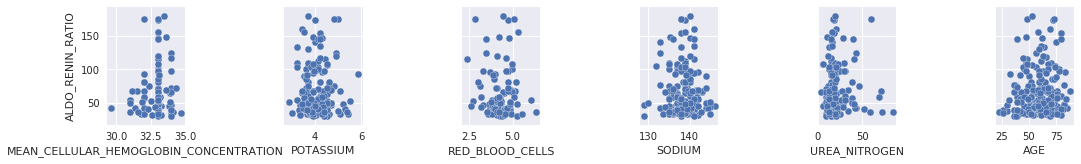

In [45]:
x_vars = ['MEAN_CELLULAR_HEMOGLOBIN_CONCENTRATION', 'POTASSIUM', 
          'RED_BLOOD_CELLS', 'SODIUM', 'UREA_NITROGEN', 'AGE']
y_vars = ['ALDO_RENIN_RATIO']
pp = sns.pairplot(data=elevated_ratio, x_vars=x_vars, y_vars=y_vars)

### Heatmap of the correlation coefficients can help us visualize better relationship

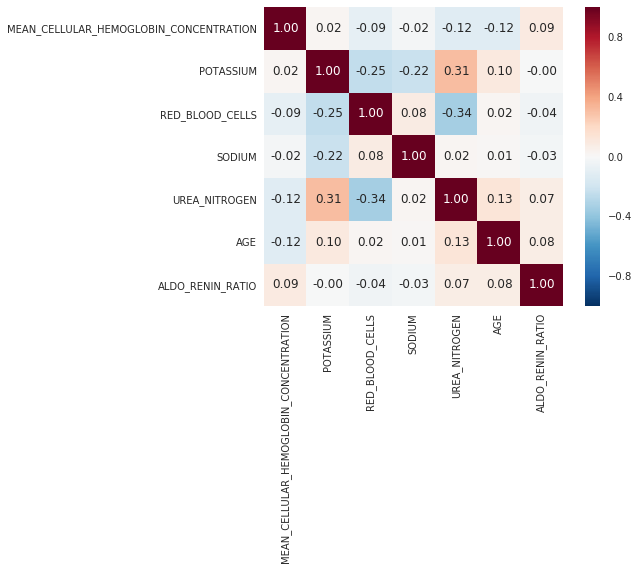

In [46]:
cols = x_vars + y_vars
# cm = np.corrcoef(elevated_ratio[cols].values.T)
# Since there are NaNs, np.corrcoef wouldn't work.
cm = elevated_ratio[cols].corr().values
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            yticklabels=cols, xticklabels=cols)

#### The correlation coefficients for lab tests above show that there's very weak relationship.

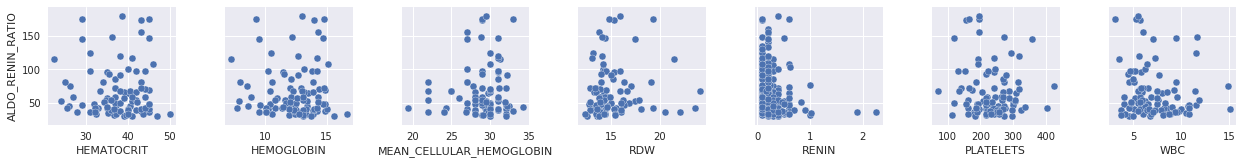

In [47]:
x_vars = ['HEMATOCRIT', 'HEMOGLOBIN', 'MEAN_CELLULAR_HEMOGLOBIN',
          'RDW', 'RENIN', 'PLATELETS', 'WBC']
y_vars = ['ALDO_RENIN_RATIO']
pp = sns.pairplot(data=elevated_ratio, x_vars=x_vars, y_vars=y_vars)

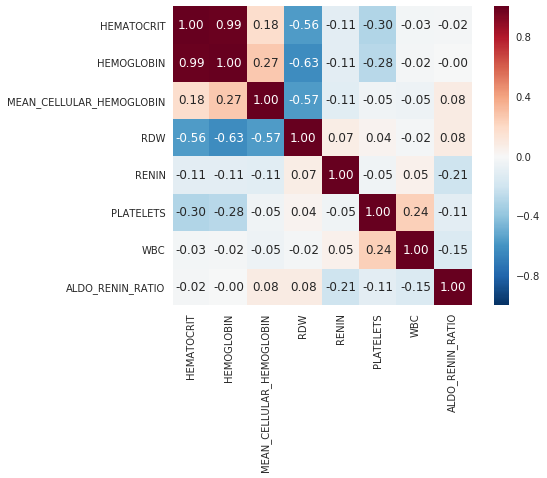

In [48]:
cols = x_vars + y_vars
cm = elevated_ratio[cols].corr().values
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            yticklabels=cols, xticklabels=cols)

#### Heatmaps above show that there's somewhat negative relationship between RENIN and ALDO_RENIN_RATIO. It makes some sense because of the way ALDO_RENIN_RATIO generated.

### Fit a simple linear regression of RENIN as predictor

In [49]:
X = elevated_ratio[['RENIN']].values
y = elevated_ratio['ALDO_RENIN_RATIO'].values

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
lr.coef_[0]

-27.955395235939289

In [51]:
lr.intercept_

73.729712053929234

### Plots of fitted line

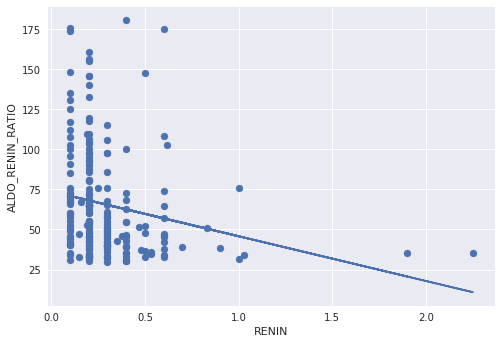

In [52]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X))
plt.xlabel('RENIN')
plt.ylabel('ALDO_RENIN_RATIO')

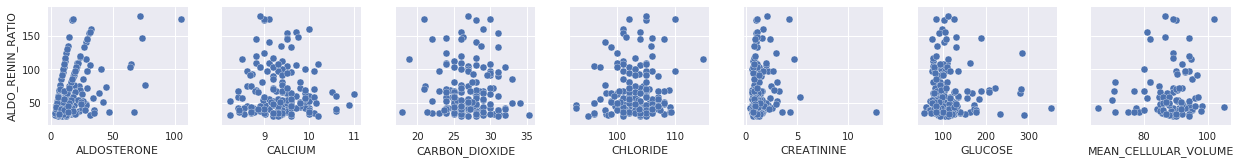

In [53]:
x_vars = ['ALDOSTERONE', 'CALCIUM', 'CARBON_DIOXIDE', 'CHLORIDE', 
          'CREATININE', 'GLUCOSE', 'MEAN_CELLULAR_VOLUME']
y_vars = ['ALDO_RENIN_RATIO']
sns.pairplot(data=elevated_ratio, x_vars=x_vars, y_vars=y_vars)

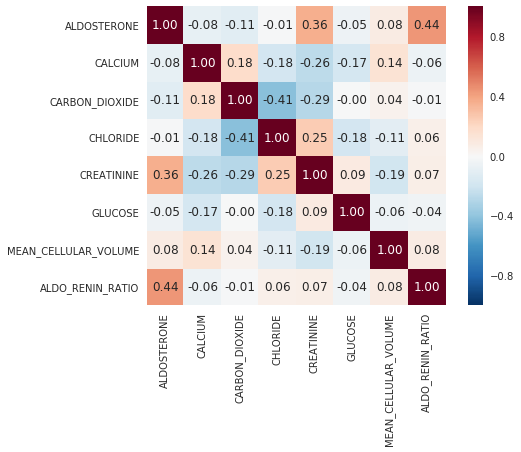

In [54]:
cols = x_vars + y_vars
cm = elevated_ratio[cols].corr().values
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            yticklabels=cols, xticklabels=cols)

#### The heatmap above shows that there's somewhat positive relationship between ALDOSTERONE and ALDO_RENIN_RATIO. As with RENIN, it's no surprise. We can fit a simple linear regression.

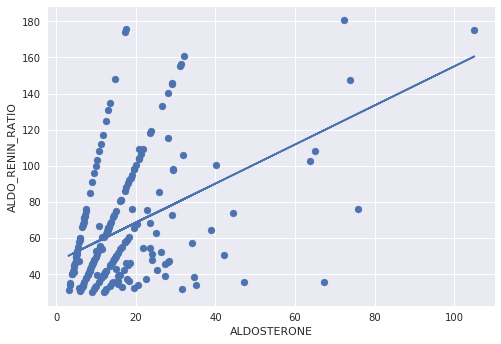

In [55]:
X = elevated_ratio[['ALDOSTERONE']].values
y = elevated_ratio['ALDO_RENIN_RATIO'].values

lr = LinearRegression()
lr.fit(X, y)

plt.scatter(X, y)
plt.plot(X, lr.predict(X))
plt.xlabel('ALDOSTERONE')
plt.ylabel('ALDO_RENIN_RATIO')

### We can try standardizing the data to see if it helps.

/ihme/forecasting/envs/jiawei_conda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/ihme/forecasting/envs/jiawei_conda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


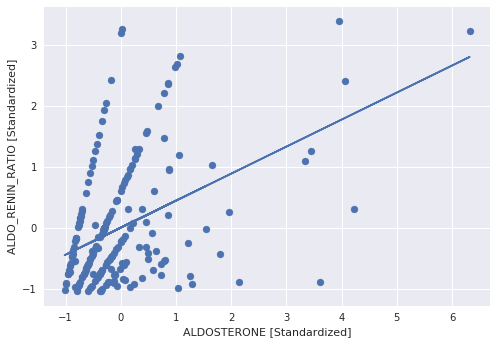

In [69]:
X = elevated_ratio[['ALDOSTERONE']].values
y = elevated_ratio['ALDO_RENIN_RATIO'].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegression()
lr.fit(X_std, y_std)

plt.scatter(X_std, y_std)
plt.plot(X_std, lr.predict(X_std))
plt.xlabel('ALDOSTERONE [Standardized]')
plt.ylabel('ALDO_RENIN_RATIO [Standardized]')

#### In the the graph above, there are a few lines in the scatterplots. Could it be caused by gender? We can explore a little.

### Scatterplots of ALDOSTERONE and ALDO_RENIN_RATIO for male

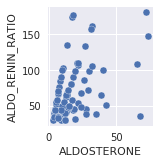

In [56]:
x_vars = 'ALDOSTERONE'
y_vars = 'ALDO_RENIN_RATIO'

sns.pairplot(data=elevated_ratio.loc[elevated_ratio.GENDER_MASTER_CODE=='M'], 
             x_vars=x_vars, y_vars=y_vars)

### Scatterplots of ALDOSTERONE and ALDO_RENIN_RATIO for female

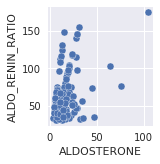

In [57]:
sns.pairplot(data=elevated_ratio.loc[elevated_ratio.GENDER_MASTER_CODE=='F'], 
             x_vars=x_vars, y_vars=y_vars)

#### The two graphs above show that gender doesn't play a role in the relationship between ALDOSTERONE and ALDO_RENIN_RATIO.

### We can also visualize the pairplots mapping the genders

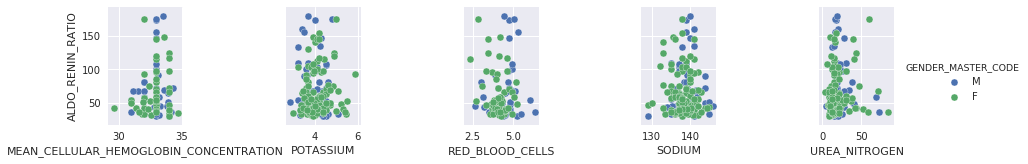

In [58]:
x_vars = ['MEAN_CELLULAR_HEMOGLOBIN_CONCENTRATION', 'POTASSIUM', 
          'RED_BLOOD_CELLS', 'SODIUM', 'UREA_NITROGEN']
y_vars = ['ALDO_RENIN_RATIO']
pp = sns.pairplot(data=elevated_ratio, x_vars=x_vars, y_vars=y_vars, hue='GENDER_MASTER_CODE')

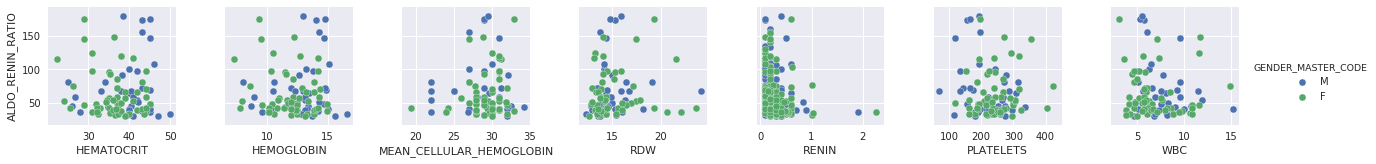

In [59]:
x_vars = ['HEMATOCRIT', 'HEMOGLOBIN', 'MEAN_CELLULAR_HEMOGLOBIN',
          'RDW', 'RENIN', 'PLATELETS', 'WBC']
y_vars = ['ALDO_RENIN_RATIO']
pp = sns.pairplot(data=elevated_ratio, x_vars=x_vars, y_vars=y_vars, hue='GENDER_MASTER_CODE')

### Trying Lasso regularization for the purpose of feature selection.

#### It turned out the missing values for some tests prevented me from implementing the method. So one challenge in this exercise is how to deal with missing values.

In [60]:
# Another challenge encountered is how to deal with missing values.
cols = ['AGE', 'ALDOSTERONE', 'CALCIUM', 'CARBON_DIOXIDE', 'CHLORIDE', 
        'CREATININE', 'GLUCOSE', 'HEMATOCRIT', 'HEMOGLOBIN', 'MEAN_CELLULAR_HEMOGLOBIN', 
        'MEAN_CELLULAR_HEMOGLOBIN_CONCENTRATION', 'MEAN_CELLULAR_VOLUME', 'PLATELETS', 
        'POTASSIUM', 'RDW', 'RED_BLOOD_CELLS', 'RENIN', 'SODIUM', 'UREA_NITROGEN', 'WBC']
X = elevated_ratio[cols].values
y = elevated_ratio['ALDO_RENIN_RATIO'].values

from sklearn import linear_model
lr = linear_model.Lasso(alpha=0.1)
lr.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### We can at least include lab tests ALDOSTERONE and RENIN as predictors

In [64]:
cols = ['ALDOSTERONE', 'RENIN']
X = elevated_ratio[cols].values
y = elevated_ratio['ALDO_RENIN_RATIO'].values

lr = linear_model.Lasso(alpha=0.1)
lr.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
lr.coef_

array([   2.27473532, -105.66449178])

In [66]:
lr.intercept_

57.30784336717457

### Given more time, I'll probably explore more like K-fold cross-validation, model evaluation, nonlinear relationship, PCA, and so on.

### One big challenge: how to deal with missing values for some lab tests.

### One question about this exercise: is this a real-world research project? If we have ALDOSTERONE and RENIN lab tests results, then we can calculate aldo:renin ratios. Why do we need to predict elevated ratios. Or because we want to find out the relationship between elevated ratios and other lab tests?